In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import joblib
from sklearn.pipeline import Pipeline

In [32]:
df = pd.read_parquet('../data/processed_churn_data.parquet')
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

In [33]:
X = df.drop(columns=['Churn'])
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
wcss_scores = []

for i in range(1, 15):
    kmeans = KMeans(
        n_clusters=i, 
        init='k-means++', 
        n_init=10, 
        random_state=42
    )
    
    kmeans.fit(X_scaled)
    
    wcss_scores.append(kmeans.inertia_)

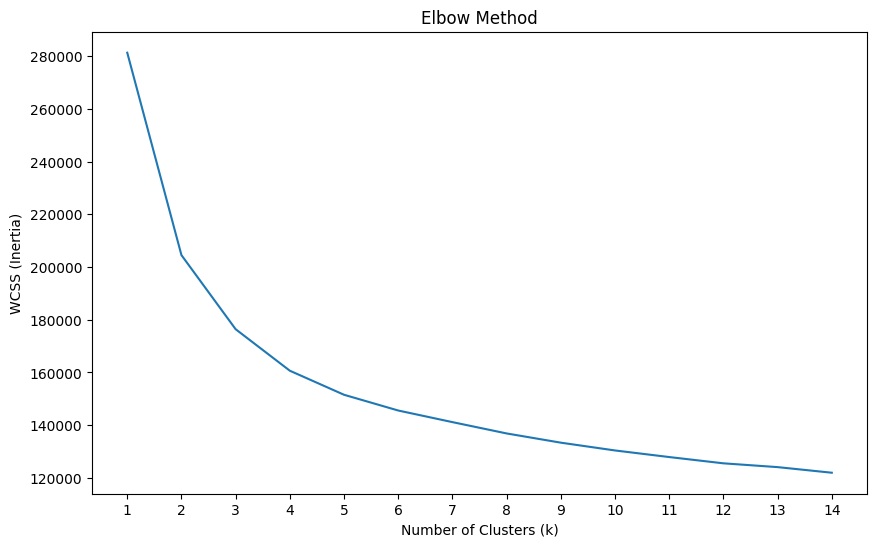

In [ ]:
cluster_range = range(1, 15)
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss_scores)

plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(cluster_range)
plt.grid(True, alpha=0.3)

plt.show()

In [36]:
k = 5

kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42))
])

kmeans_pipeline.fit(X)

joblib.dump(kmeans_pipeline, '../models/kmeans_pipeline.pkl')

['../models/kmeans_pipeline.pkl']

In [37]:
df['Cluster'] = kmeans_pipeline.named_steps['kmeans'].labels_

cluster_profiles = df.groupby('Cluster').mean()

print(cluster_profiles)

           gender  SeniorCitizen   Partner  Dependents     tenure  \
Cluster                                                             
0        0.505325       0.178107  0.709467    0.368047  58.021302   
1        0.493408       0.300710  0.367140    0.152637  19.020284   
2        0.496581       0.078632  0.365812    0.286325  20.654701   
3        0.490789       0.034211  0.482237    0.419079  30.667763   
4        0.483824       0.152941  0.454412    0.300000  31.830882   

         PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
Cluster                                                                 
0                 1.0          0.682840       94.448077   5497.001213   
1                 1.0          0.790061       85.163869   1667.529386   
2                 1.0          0.534188       57.700641   1236.272521   
3                 1.0          0.292763       21.076283    665.220329   
4                 0.0          0.567647       41.992500   1500.433750   

    